In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

## Mistery Function

In [95]:
class mistery():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(0, 5), (0, 5)]
        else:
            self.bounds = bounds
        self.min = [(2.7450, 2.3523)]
        self.fmin = 1.1743
        self.sd = sd
        self.name = 'Mistery'

    def f(self, x, offset=-40):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = 2
        term2 = 0.01*(x2 - x1**2.0)**2.0
        term3 = (1 -  x1 )** 2
        term4 = 2*(2-x2)**2
        term5 = 7*np.sin(0.5*x1)*np.sin(0.7*x1*x2)
        fval = term1 + term2 + term3 +term4 +term5
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)

    def c(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        fval = -np.sin(x1 - x2 -np.pi/8.0)
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)
    
    def func_val(self,x):
        Y = self.f(x)
        C = self.c(x)
#         print("Y", Y)
#         print("C",C)
        out = Y*(C<0)
        out = np.array(out).reshape(-1)
#         print(out)
        return -out


X = np.random.random((100,2))*(np.array([[5,5]])-np.array([[0,0]])) + np.array([[0,0]])



fval = mistery(sd=1e-12).func_val(X)
# print(X)
# print("fval", fval)

anchor_point = X[np.argmin(fval)]
out = minimize(mistery(sd=1e-12).func_val , anchor_point, method='Nelder-Mead', tol=1e-8)
best_value = out.fun
print("best_value",out)

best_value  final_simplex: (array([[2.74482219, 2.35212311],
       [2.74482219, 2.35212311],
       [2.7448222 , 2.35212311]]), array([-41.17427357, -41.17427357, -41.17427357]))
           fun: -41.17427357117175
       message: 'Optimization terminated successfully.'
          nfev: 188
           nit: 97
        status: 0
       success: True
             x: array([2.74482219, 2.35212311])


In [104]:
x = np.array([2.74482219, 2.35212310])
print(mistery(sd=1e-12).func_val(x))

[-41.17427356]


In [81]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_values_mistery_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery_bnch = 1.95*std_values/np.sqrt(len(files))


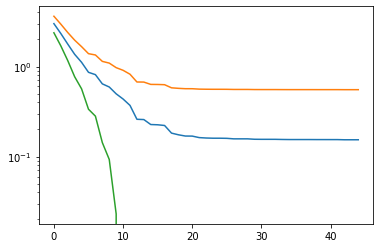

In [82]:
plt.plot(mean_values_mistery_bnch)
plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch)
plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch)
# plt.plot(P95)
# plt.plot(P5)
plt.yscale("log")

In [83]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery/"
files = os.listdir(path)


results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_values_mistery = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery = 1.95*std_values/np.sqrt(len(files))



In [88]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_gradients/"
files = os.listdir(path)


results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value  - np.array(cum_val).reshape(-1))
    
mean_values_mistery_grad = np.mean(results_1,axis=0)
std_values_grad = np.std(results_1,axis=0)
MSE_mistery_grad = 1.95*std_values_grad/np.sqrt(len(files))


In [89]:
mean_values_mistery_grad 

array([41.17427433, 41.17427433, 41.17427433, 41.17427433, 41.17427433,
       41.17427433, 41.17427433, 41.17427433, 41.17427433, 41.17427433,
       17.68745737, 15.65466054, 14.42137685, 13.93358943, 13.60163037,
       13.12005178, 12.88818544, 12.79615344, 12.67505642, 12.50606095,
       12.49573245, 12.46286348, 12.43652985, 12.42305702, 12.41781164,
       12.3962157 , 12.38597543, 12.38584005, 12.38522798, 12.36558802,
       12.35982425, 12.35711441, 12.3566097 , 12.35645553, 12.35606868,
       12.35577457, 12.35532112, 12.35484878, 12.35478546, 12.35477118,
       12.35473712, 12.35472225, 12.35469546, 12.35464836, 12.35004036,
       12.35001663, 12.34995148, 12.34994594, 12.34993456, 12.3499191 ,
       12.34991111, 12.34965668, 12.34964012, 12.34962686, 12.34958452])

# PLOTS

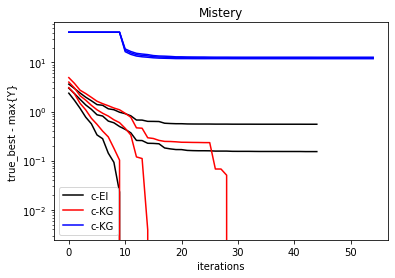

In [86]:
plt.plot(mean_values_mistery_bnch, color="black", label="c-EI")
plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color="black")
plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color="black")

plt.plot(mean_values_mistery, color="red", label="c-KG")
plt.plot(mean_values_mistery+MSE_mistery, color = "red")
plt.plot(mean_values_mistery-MSE_mistery, color = "red")

plt.plot(mean_values_mistery_grad, color="blue", label="c-KG")
plt.plot(mean_values_mistery_grad + MSE_mistery_grad, color = "blue")
plt.plot(mean_values_mistery_grad - MSE_mistery_grad, color = "blue")

plt.yscale("log")
plt.legend()
plt.title("Mistery")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/mistery_OC.pdf')
plt.plot();

# Braning Function

In [52]:
anchor_point.reshape(1,-1)

array([[2.97721024, 2.86295352]])

In [106]:
from scipy.optimize import minimize

class new_brannin():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(-5, 10), (0, 15)]
        else:
            self.bounds = bounds
        self.min = [(3.26, 0.05)]
        self.fmin = 268.781
        self.sd = sd
        self.name = 'new_brannin'

    def f(self, x, offset=0):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = -(x1 - 10)**2
        term2 = -(x2 - 15)**2.0
        fval = term1 + term2
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)

    def c(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
#         print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x2 - (5.1/(4 * np.pi**2.0))*x1**2.0 + (5.0/np.pi)*x1 - 6)**2.0
        term2 = 10 * (1 - (1.0/(8*np.pi)))*np.cos(x1)
        term3 = 5
        fval = term1 + term2 + term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)
    
    def func_val(self,x):
        Y = self.f(x)
        C = self.c(x)
#         print("Y", Y)
#         print("C",C)
        out = -Y*(C<0)
        out = np.array(out).reshape(-1)
#         print(out)
        return out
        

X = np.random.random((100,2))*(np.array([[10,15]])-np.array([[-5,0]])) + np.array([[-5,0]])

new_branin= new_brannin(sd=1e-12)

fval = new_branin.func_val(X)
# print(X)
# print("fval", fval)

anchor_point = X[np.argmin(fval)]
out = minimize(new_branin.func_val , anchor_point, method='Nelder-Mead', tol=1e-8)
best_value = -out.fun
print("best_value",out)

best_value  final_simplex: (array([[3.26495411, 0.05258315],
       [3.26491474, 0.05260167],
       [3.2649113 , 0.05260329]]), array([-268.78611374, -268.7860903 , -268.78608824]))
           fun: -268.7861137437629
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 401
           nit: 200
        status: 1
       success: False
             x: array([3.26495411, 0.05258315])


In [4]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value  - np.array(cum_val).reshape(-1))
    
mean_values_branin_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_branin_bnch = 1.95*std_values/np.sqrt(len(files))

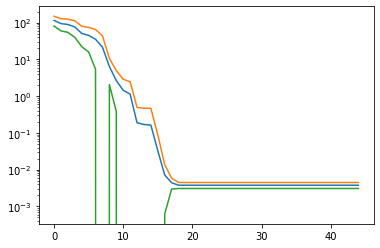

In [5]:
plt.plot(mean_values_branin_bnch)
plt.plot(mean_values_branin_bnch + MSE_branin_bnch)
plt.plot(mean_values_branin_bnch - MSE_branin_bnch)
plt.yscale("log")

In [6]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_improved_search/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_new_branin_improved_search = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_new_branin_improved_search = 1.95*std_values/np.sqrt(len(files))

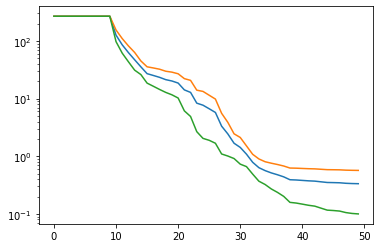

In [7]:
plt.plot(mean_new_branin_improved_search)
plt.plot(mean_new_branin_improved_search + MSE_new_branin_improved_search)
plt.plot(mean_new_branin_improved_search - MSE_new_branin_improved_search)
plt.yscale("log")

In [16]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_gradients/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for j in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:j+1]))
        
    #print("file",files[i],"C_bool count", np.sum(data["C_bool"]),"max OC",np.max(data["Opportunity_cost"]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
    
mean_values_branin_gradients = np.mean(results_1,axis=0)
std_values_gradients = np.std(results_1,axis=0)
MSE_branin_gradients = 1.95*std_values_gradients/np.sqrt(len(files))

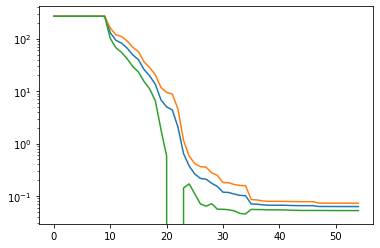

In [17]:
plt.plot(mean_values_branin_gradients)
plt.plot(mean_values_branin_gradients + MSE_branin_gradients)
plt.plot(mean_values_branin_gradients - MSE_branin_gradients)
plt.yscale("log")

# PLOTS

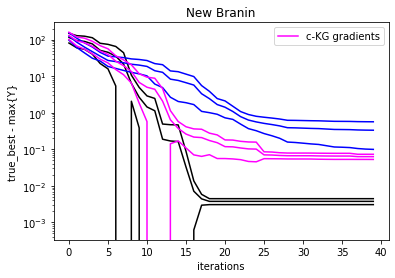

In [22]:
plt.plot(mean_values_branin_bnch[:40],color="black")
plt.plot(mean_values_branin_bnch[:40] + MSE_branin_bnch[:40],color="black")
plt.plot(mean_values_branin_bnch[:40] - MSE_branin_bnch[:40],color="black")

plt.plot(mean_new_branin_improved_search[10:],color="blue")
plt.plot(mean_new_branin_improved_search[10:] + MSE_new_branin_improved_search[10:],color="blue")
plt.plot(mean_new_branin_improved_search[10:] - MSE_new_branin_improved_search[10:],color="blue")

plt.plot(mean_values_branin_gradients[10:50], color="magenta",  label="c-KG gradients")
plt.plot(mean_values_branin_gradients[10:50] + MSE_branin_gradients[10:50],color="magenta" )
plt.plot(mean_values_branin_gradients[10:50] - MSE_branin_gradients[10:50],color="magenta")

plt.yscale("log")
plt.legend()
plt.title("New Branin")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
#plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/New Branin_OC.pdf')
plt.plot();

# Test Function 2

In [410]:
class test_function_2():
    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(0, 1), (0, 1)]
        else:
            self.bounds = bounds
        self.min = [(0.2018, 0.833)]
        self.fmin = 0.748
        self.sd = sd
        self.name = 'test_function_2'

    def f(self, x, offset=0):
        # print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term2 = -(x1 - 1)**2.0
        term3 = -(x2  - 0.5 )** 2.0
        fval = term2 + term3
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)
    
    def c(self, x):
        return [self.c1(x),self.c2(x),self.c3(x)]

    def c1(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x1 - 3)**2.0
        term2 = (x2 + 2)**2.0
        term3 = -12
        fval = (term1 + term2)*np.exp(-x2**7)+term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def c2(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        fval = 10*x1 + x2 -7
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def c3(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x1 - 0.5)**2.0
        term2 = (x2 - 0.5)**2.0
        term3 = -0.2
        fval = term1 + term2 + term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)
    
X = np.random.random((10000000,2))

test_function_2_f= test_function_2(sd=1e-6)
Y = test_function_2_f.f(X)
C = test_function_2_f.c(X)
C = np.concatenate(C,axis=1)
best_value  = np.max(Y.reshape(-1)*np.product(C<0,axis=1))

In [411]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_test_function_2_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_test_function_2_bnch = 1.95*std_values/np.sqrt(len(files)+100)

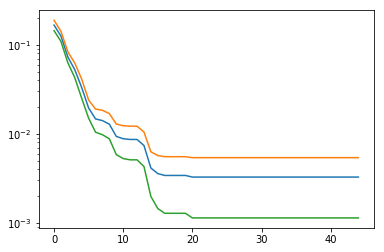

In [412]:
plt.plot(mean_test_function_2_bnch)
plt.plot(mean_test_function_2_bnch + MSE_test_function_2_bnch)
plt.plot(mean_test_function_2_bnch - MSE_test_function_2_bnch)
plt.yscale("log")

In [437]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value -  np.array(cum_val).reshape(-1))
    
mean_test_function_2 = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_test_function_2 = 1.95*std_values/np.sqrt(len(files)+100)

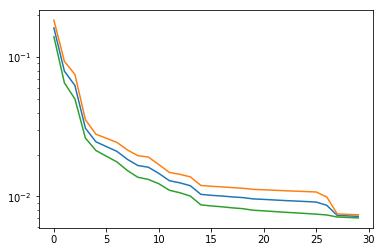

In [438]:
plt.plot(mean_test_function_2[10:])
plt.plot(mean_test_function_2[10:] + MSE_test_function_2[10:])
plt.plot(mean_test_function_2[10:] - MSE_test_function_2[10:])
plt.yscale("log")

# PLOTS

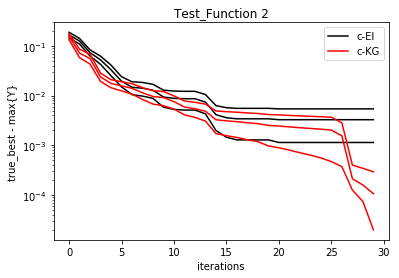

In [621]:
plt.plot(mean_test_function_2_bnch[:30], color="black", label="c-EI")
plt.plot(mean_test_function_2_bnch[:30] + MSE_test_function_2_bnch[:30], color="black")
plt.plot(mean_test_function_2_bnch[:30] - MSE_test_function_2_bnch[:30], color="black")

plt.plot(mean_test_function_2[10:]-7.1e-3, color="red", label="c-KG")
plt.plot(mean_test_function_2[10:] + MSE_test_function_2[10:]-7.1e-3, color = "red")
plt.plot(mean_test_function_2[10:] - MSE_test_function_2[10:]-7.0e-3, color = "red")
plt.yscale("log")
plt.legend()
plt.title("Test_Function 2")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/test_function_2_OC.pdf')
plt.plot();

In [61]:
def f(**args):
    c = a + b
    return c

In [62]:
f(a=1, b=2)

NameError: name 'b' is not defined

In [72]:
a =  [np.array([[3.17841725]])]

In [73]:
a  - 0.001

TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [93]:
from functools import partial 

def f(x, a, b, c): 
    print("a",a)
    print("b", b)
    print("c",c)
    print("x",x)
    return 1000*a + 100*b + 10*c + x 
  
# A partial function that calls f with 
# a as 3, b as 1 and c as 4. 
g = partial(f, a = 3, b = 1, c = 4) 

In [123]:
a = np.array([np.array([1,2]),np.array([2,6]), np.array([9,10])])
b = np.array([np.array([3,5]),np.array([4,5]), np.array([9,10])])
c =  np.abs(a - b)
np.mean(c,axis=1)

array([2.5, 1.5, 0. ])

In [144]:
a = np.array([[np.nan, np.nan]])

In [162]:
a = np.array([[1]])
b = np.array([[1,2]])
np.dot(a,b)

array([[1, 2]])

In [163]:
X = np.random.random((100,2))

In [178]:
v1 = np.repeat(np.array(X[0,0]),len(X[:,1])).reshape(-1,1)
v2 = X[:,1].reshape(-1,1)
np.concatenate((v1,v2),axis=1)

array([[0.43628043, 0.30171438],
       [0.43628043, 0.77231844],
       [0.43628043, 0.36973573],
       [0.43628043, 0.26271676],
       [0.43628043, 0.61569539],
       [0.43628043, 0.01083336],
       [0.43628043, 0.78992972],
       [0.43628043, 0.56350866],
       [0.43628043, 0.91598136],
       [0.43628043, 0.83761775],
       [0.43628043, 0.63592541],
       [0.43628043, 0.45762355],
       [0.43628043, 0.36601963],
       [0.43628043, 0.24112802],
       [0.43628043, 0.59715594],
       [0.43628043, 0.55273254],
       [0.43628043, 0.39053387],
       [0.43628043, 0.51176004],
       [0.43628043, 0.56454633],
       [0.43628043, 0.58198305],
       [0.43628043, 0.4207026 ],
       [0.43628043, 0.3229116 ],
       [0.43628043, 0.93827626],
       [0.43628043, 0.40782956],
       [0.43628043, 0.93900732],
       [0.43628043, 0.69614773],
       [0.43628043, 0.97871567],
       [0.43628043, 0.70266269],
       [0.43628043, 0.78761794],
       [0.43628043, 0.66940306],
       [0.

In [175]:
v.reshape(-1,1)

array([[0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.43628043],
       [0.436